### Task 1 : Average annual, seasonal temperature and precipitation and drought indicators for those district (Mugu, Kalikot, Jumla and Humla)

- ERA5 data of 1950 to 2023 

In [9]:
# Import libraries 

import pandas as pd 
from scipy.stats import linregress 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Load ERA5 data 

precTot_1950_2023_district = pd.read_csv("E:/GIIS/ERA5 Hourly Data/Data/Average_grid_data (Fourth)/District/precTot_1950_2023_district.csv")
tempMax_1950_2023_district = pd.read_csv("E:/GIIS/ERA5 Hourly Data/Data/Average_grid_data (Fourth)/District/tempMax_1950_2023_district.csv")
tempMin_1950_2023_district = pd.read_csv("E:/GIIS/ERA5 Hourly Data/Data/Average_grid_data (Fourth)/District/tempMin_1950_2023_district.csv")

In [3]:
# Select particular districts according to our need 

precTot_1950_2023_district = precTot_1950_2023_district[["year", "month", "day", "MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMax_1950_2023_district = tempMax_1950_2023_district[["year", "month", "day", "MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMin_1950_2023_district = tempMin_1950_2023_district[["year", "month", "day", "MUGU", "KALIKOT", "JUMLA", "HUMLA"]]

#### Annual mean and annual sum

In [10]:
# Take annual mean and annual sum of min, max and precp 

tempMax_1950_2023_annual_mean = tempMax_1950_2023_district.groupby("year", as_index=False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
tempMin_1950_2023_annual_mean = tempMin_1950_2023_district.groupby("year", as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
precTot_1950_2023_annual_sum = precTot_1950_2023_district.groupby("year", as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].sum()

In [17]:
# Filter according to year 1970-2022 

tempMax_1970_2023_annual_mean = tempMax_1950_2023_annual_mean[(tempMax_1950_2023_annual_mean["year"] >= 1970) & (tempMax_1950_2023_annual_mean["year"] <= 2023)]
tempMin_1970_2023_annual_mean = tempMin_1950_2023_annual_mean[(tempMin_1950_2023_annual_mean["year"] >= 1970) & (tempMin_1950_2023_annual_mean["year"] <= 2023)]
precTot_1970_2023_annual_sum = precTot_1950_2023_annual_sum[(precTot_1950_2023_annual_sum["year"] >= 1970) & (precTot_1950_2023_annual_sum["year"] <= 2023)]

In [ ]:
# Take mean of Max and Min temperature 

tempMean_1970_2023_annual_mean = pd.concat([tempMax_1970_2023_annual_mean, tempMin_1970_2023_annual_mean]).groupby(level=0).mean()
tempMean_1970_2023_annual_mean = tempMean_1970_2023_annual_mean[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMean_1970_2023_annual_mean

In [ ]:
year = tempMax_1970_2023_annual_mean[["year"]]
year

In [ ]:
tempMean_1970_2023_annual_mean = pd.merge(year, tempMean_1970_2023_annual_mean, left_index=True, right_index=True, how='inner')
tempMean_1970_2023_annual_mean

In [ ]:
# Now we have 4 dataframes to work with 

#tempMax_1970_2023_annual_mean
#tempMin_1970_2023_annual_mean
#tempMean_1970_2023_annual_mean
#precTot_1970_2023_annual_sum

In [ ]:
tempMin_1970_2023_annual_mean = tempMin_1970_2023_annual_mean.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMin_1970_2023_annual_mean.csv")
tempMax_1970_2023_annual_mean = tempMax_1970_2023_annual_mean.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMax_1970_2023_annual_mean.csv")
tempMean_1970_2023_annual_mean = tempMean_1970_2023_annual_mean.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMean_1970_2023_annual_mean.csv")
precTot_1970_2023_annual_sum = precTot_1970_2023_annual_sum.to_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/precTot_1970_2023_annual_sum.csv")

#### Monthly mean and monthly sum 

In [4]:
tempMax_1950_2023_district

,year,month,day,MUGU,KALIKOT,JUMLA,HUMLA
0,1950,1,1,-6.706208,2.563195,-2.790106,-11.227682
1,1950,1,2,-6.303056,5.241160,-1.715755,-11.896724
2,1950,1,3,-6.355443,6.279757,-1.193647,-13.382866
3,1950,1,4,-4.619134,7.139030,0.304827,-11.703918
4,1950,1,5,-6.250503,6.166445,-1.210127,-13.177432
...,...,...,...,...,...,...,...
27023,2023,12,27,1.824372,11.557232,5.583734,-4.188072
27024,2023,12,28,1.285959,11.182984,5.115054,-5.265166
27025,2023,12,29,0.813693,10.599538,4.356198,-5.680753
27026,2023,12,30,0.081718,10.297513,3.971295,-6.239145


In [5]:
# Take annual mean and annual sum of min, max and precp 

tempMax_1950_2023_monthly_mean = tempMax_1950_2023_district.groupby(["year", "month"], as_index=False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
tempMin_1950_2023_monthly_mean = tempMin_1950_2023_district.groupby(["year", "month"], as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].mean()
precTot_1950_2023_monthly_sum = precTot_1950_2023_district.groupby(["year", "month"], as_index= False)[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]].sum()

In [6]:
# Filter according to year 1970-2022 

tempMax_1970_2023_monthly_mean = tempMax_1950_2023_monthly_mean[(tempMax_1950_2023_monthly_mean["year"] >= 1970) & (tempMax_1950_2023_monthly_mean["year"] <= 2023)]
tempMin_1970_2023_monthly_mean = tempMin_1950_2023_monthly_mean[(tempMin_1950_2023_monthly_mean["year"] >= 1970) & (tempMin_1950_2023_monthly_mean["year"] <= 2023)]
precTot_1970_2023_monthly_sum = precTot_1950_2023_monthly_sum[(precTot_1950_2023_monthly_sum["year"] >= 1970) & (precTot_1950_2023_monthly_sum["year"] <= 2023)]

In [7]:
# Take mean of Max and Min temperature 

tempMean_1970_2023_monthly_mean = pd.concat([tempMax_1970_2023_monthly_mean, tempMin_1970_2023_monthly_mean]).groupby(level=0).mean()
tempMean_1970_2023_monthly_mean = tempMean_1970_2023_monthly_mean[["MUGU", "KALIKOT", "JUMLA", "HUMLA"]]
tempMean_1970_2023_monthly_mean

,MUGU,KALIKOT,JUMLA,HUMLA
240,-8.918266,2.059429,-5.644361,-13.918480
241,-9.541298,2.088249,-6.782284,-14.049714
242,-6.424570,6.022203,-3.102634,-10.741972
243,-0.080234,12.637440,3.455937,-5.068893
244,4.716162,15.532056,7.544856,0.418193
...,...,...,...,...
883,11.112354,16.859955,12.524665,8.255846
884,9.094696,16.060866,10.998502,5.532925
885,1.671238,11.257936,4.202403,-2.328601
886,-1.175073,7.979122,1.284949,-6.790713


In [8]:
year_month = tempMax_1970_2023_monthly_mean[["year", "month"]]
year_month

,year,month
240,1970,1
241,1970,2
242,1970,3
243,1970,4
244,1970,5
...,...,...
883,2023,8
884,2023,9
885,2023,10
886,2023,11


In [9]:
tempMean_1970_2023_monthly_mean = pd.merge(year_month, tempMean_1970_2023_monthly_mean, left_index=True, right_index=True, how='inner')
tempMean_1970_2023_monthly_mean

,year,month,MUGU,KALIKOT,JUMLA,HUMLA
240,1970,1,-8.918266,2.059429,-5.644361,-13.918480
241,1970,2,-9.541298,2.088249,-6.782284,-14.049714
242,1970,3,-6.424570,6.022203,-3.102634,-10.741972
243,1970,4,-0.080234,12.637440,3.455937,-5.068893
244,1970,5,4.716162,15.532056,7.544856,0.418193
...,...,...,...,...,...,...
883,2023,8,11.112354,16.859955,12.524665,8.255846
884,2023,9,9.094696,16.060866,10.998502,5.532925
885,2023,10,1.671238,11.257936,4.202403,-2.328601
886,2023,11,-1.175073,7.979122,1.284949,-6.790713


In [ ]:
# Now we have 4 monthly dataframes to work with 

#tempMax_1970_2023_monthly_mean
#tempMin_1970_2023_monthly_mean
#tempMean_1970_2023_monthly_mean
#precTot_1970_2023_monthly_sum

In [10]:
tempMin_1970_2023_monthly_mean = tempMin_1970_2023_monthly_mean.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMin_1970_2023_monthly_mean.csv")
tempMax_1970_2023_monthly_mean = tempMax_1970_2023_monthly_mean.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMax_1970_2023_monthly_mean.csv")
tempMean_1970_2023_monthly_mean = tempMean_1970_2023_monthly_mean.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMean_1970_2023_monthly_mean.csv")
precTot_1970_2023_monthly_sum = precTot_1970_2023_monthly_sum.to_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/precTot_1970_2023_monthly_sum.csv")

### Average annual, seasonal temperature and precipitation (monthly data) and drought indicators for those district

In [6]:
# Annual data
import pandas as pd
import numpy as np

tempMin_1970_2023_annual_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMin_1970_2023_annual_mean.csv")
tempMax_1970_2023_annual_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMax_1970_2023_annual_mean.csv")
tempMean_1970_2023_annual_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/tempMean_1970_2023_annual_mean.csv")
precTot_1970_2023_annual_sum = pd.read_csv("C:/GIIS/USAID Karnali/Data/annual_max_mean_min_precp (First)/precTot_1970_2023_annual_sum.csv")

# Monthly data 

tempMin_1970_2023_monthly_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMin_1970_2023_monthly_mean.csv")
tempMax_1970_2023_monthly_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMax_1970_2023_monthly_mean.csv")
tempMean_1970_2023_monthly_mean = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMean_1970_2023_monthly_mean.csv")
precTot_1970_2023_monthly_sum = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/precTot_1970_2023_monthly_sum.csv")

In [7]:
# Annual trend of tempMax, tempMin, tempMean and precTot of 4 districts 

#tempMax

year = tempMax_1970_2023_annual_mean["year"]
Mugu_annual_tempMax = tempMax_1970_2023_annual_mean["MUGU"]
Kalikot_annual_tempMax = tempMax_1970_2023_annual_mean["KALIKOT"]
Jumla_annual_tempMax = tempMax_1970_2023_annual_mean["JUMLA"]
Humla_annual_tempMax = tempMax_1970_2023_annual_mean["HUMLA"]

#tempMin

Mugu_annual_tempMin = tempMin_1970_2023_annual_mean["MUGU"]
Kalikot_annual_tempMin = tempMin_1970_2023_annual_mean["KALIKOT"]
Jumla_annual_tempMin = tempMin_1970_2023_annual_mean["JUMLA"]
Humla_annual_tempMin = tempMin_1970_2023_annual_mean["HUMLA"]

#tempMean

Mugu_annual_tempMean = tempMean_1970_2023_annual_mean["MUGU"]
Kalikot_annual_tempMean = tempMean_1970_2023_annual_mean["KALIKOT"]
Jumla_annual_tempMean = tempMean_1970_2023_annual_mean["JUMLA"]
Humla_annual_tempMean = tempMean_1970_2023_annual_mean["HUMLA"]

#precpTot

Mugu_annual_precpTot = precTot_1970_2023_annual_sum["MUGU"]
Kalikot_annual_precpTot = precTot_1970_2023_annual_sum["KALIKOT"]
Jumla_annual_precpTot = precTot_1970_2023_annual_sum["JUMLA"]
Humla_annual_precpTot = precTot_1970_2023_annual_sum["HUMLA"]


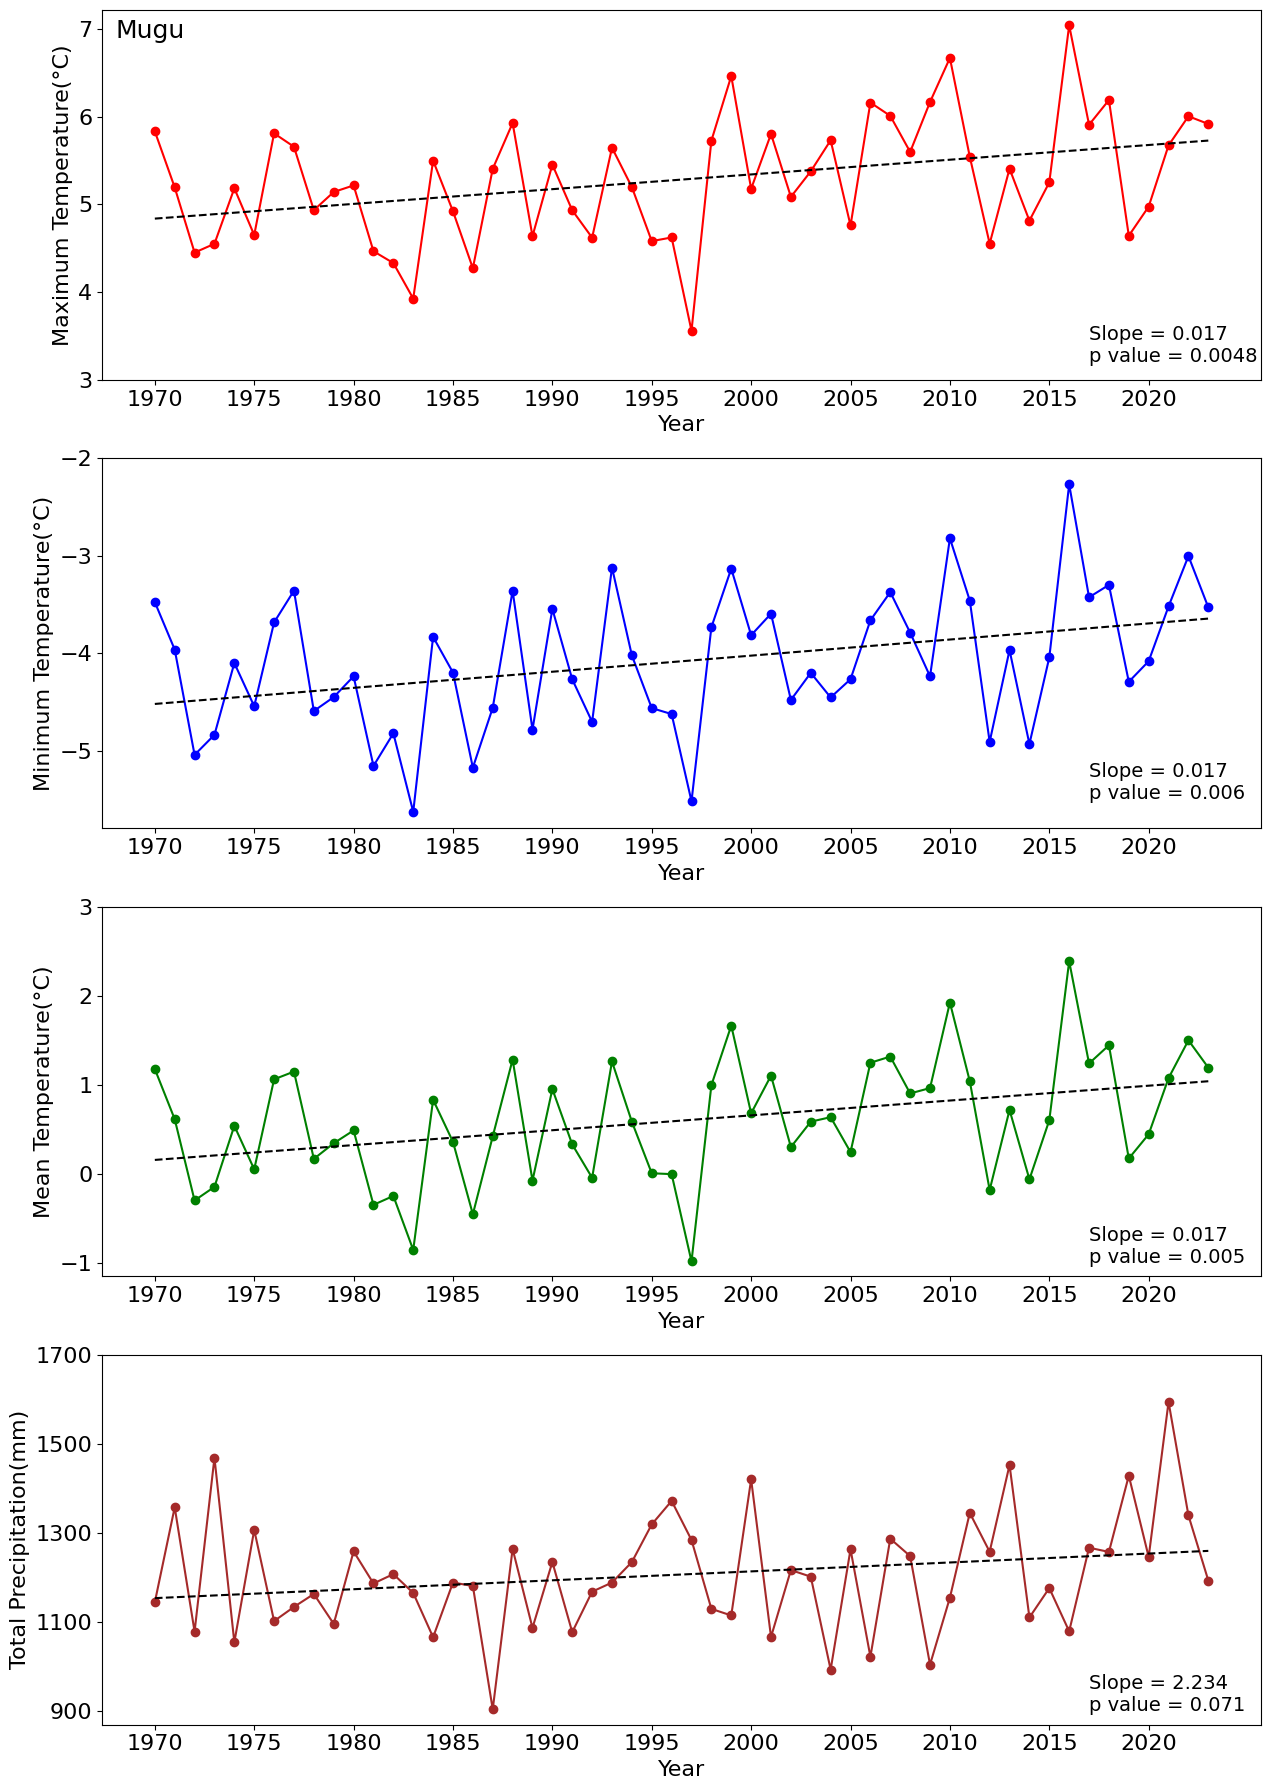

In [10]:
# %%
# Creatine a line plots for MUGU

year = tempMax_1970_2023_annual_mean["year"]
Mugu_annual_tempMax = tempMax_1970_2023_annual_mean["MUGU"]
Mugu_annual_tempMin = tempMin_1970_2023_annual_mean["MUGU"]
Mugu_annual_tempMean = tempMean_1970_2023_annual_mean["MUGU"]
Mugu_annual_precpTot = precTot_1970_2023_annual_sum["MUGU"]

# Fit linear regression model for Mugu_annual_tempMax
Mugu_annual_tempMax_coefficients = np.polyfit(year, Mugu_annual_tempMax, 1)
Mugu_annual_tempMax_polynomial = np.poly1d(Mugu_annual_tempMax_coefficients)

# Fit linear regression model for Mugu_annual_tempMin
Mugu_annual_tempMin_coefficients = np.polyfit(year, Mugu_annual_tempMin, 1)
Mugu_annual_tempMin_polynomial = np.poly1d(Mugu_annual_tempMin_coefficients)

# Fit linear regression model for Mugu_annual_tempMean
Mugu_annual_tempMean_coefficients = np.polyfit(year, Mugu_annual_tempMean, 1)
Mugu_annual_tempMean_polynomial = np.poly1d(Mugu_annual_tempMean_coefficients)

# Fit linear regression model for Mugu_annual_tempMax
Mugu_annual_precpTot_coefficients = np.polyfit(year, Mugu_annual_precpTot, 1)
Mugu_annual_precpTot_polynomial = np.poly1d(Mugu_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - MUGU (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Mugu_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Mugu_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([3,4,5,6,7], fontsize=16)
plt.text(2017,3.2,"Slope = 0.017 \np value = 0.0048", fontsize=14)
plt.text(1968, 6.9, "Mugu", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  MUGU (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Mugu_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Mugu_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([-5,-4,-3,-2], fontsize=16)
plt.text(2017,-5.5,"Slope = 0.017 \np value = 0.006 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  MUGU (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Mugu_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Mugu_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([-1,0,1,2,3], fontsize=16)
plt.text(2017,-1,"Slope = 0.017 \np value = 0.005", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - MUGU (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Mugu_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Mugu_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([900,1100,1300,1500,1700], fontsize=16)
plt.text(2017,900,"Slope = 2.234 \np value = 0.071", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('MUGU_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

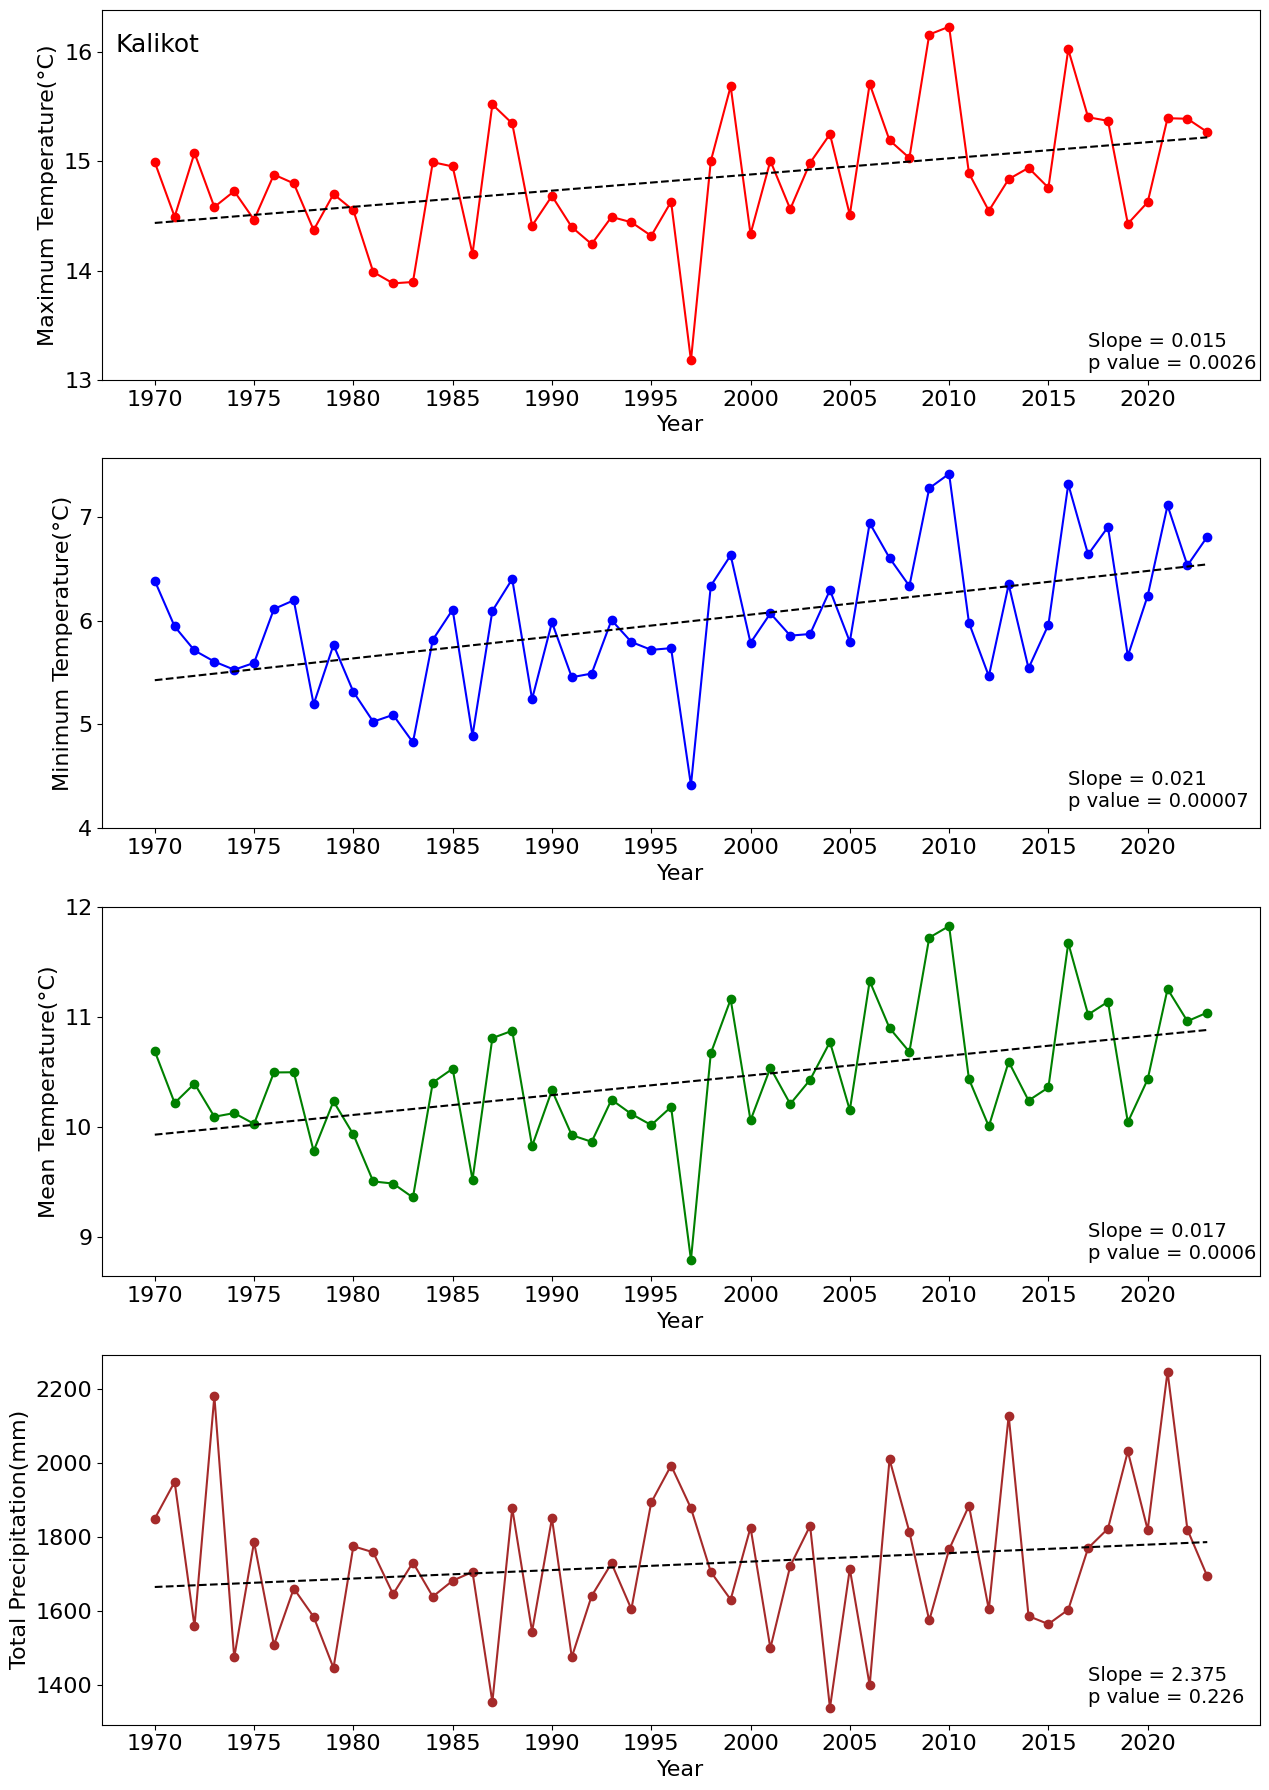

In [11]:
# %%
# Creatine a line plots for Kalikot

year = tempMax_1970_2023_annual_mean["year"]
Kalikot_annual_tempMax = tempMax_1970_2023_annual_mean["KALIKOT"]
Kalikot_annual_tempMin = tempMin_1970_2023_annual_mean["KALIKOT"]
Kalikot_annual_tempMean = tempMean_1970_2023_annual_mean["KALIKOT"]
Kalikot_annual_precpTot = precTot_1970_2023_annual_sum["KALIKOT"]

# Fit linear regression model for Kalikot_annual_tempMax
Kalikot_annual_tempMax_coefficients = np.polyfit(year, Kalikot_annual_tempMax, 1)
Kalikot_annual_tempMax_polynomial = np.poly1d(Kalikot_annual_tempMax_coefficients)

# Fit linear regression model for Kalikot_annual_tempMin
Kalikot_annual_tempMin_coefficients = np.polyfit(year, Kalikot_annual_tempMin, 1)
Kalikot_annual_tempMin_polynomial = np.poly1d(Kalikot_annual_tempMin_coefficients)

# Fit linear regression model for Kalikot_annual_tempMean
Kalikot_annual_tempMean_coefficients = np.polyfit(year, Kalikot_annual_tempMean, 1)
Kalikot_annual_tempMean_polynomial = np.poly1d(Kalikot_annual_tempMean_coefficients)

# Fit linear regression model for Kalikot_annual_tempMax
Kalikot_annual_precpTot_coefficients = np.polyfit(year, Kalikot_annual_precpTot, 1)
Kalikot_annual_precpTot_polynomial = np.poly1d(Kalikot_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - Kalikot (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Kalikot_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Kalikot_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([13,14,15,16], fontsize=16)
plt.text(2017,13.1,"Slope = 0.015 \np value = 0.0026", fontsize=14)
plt.text(1968, 16, "Kalikot", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  Kalikot (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Kalikot_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Kalikot_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([4,5,6,7], fontsize=16)
plt.text(2016,4.2,"Slope = 0.021 \np value = 0.00007 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  Kalikot (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Kalikot_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Kalikot_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([9,10,11,12], fontsize=16)
plt.text(2017,8.8,"Slope = 0.017 \np value = 0.0006", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - Kalikot (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Kalikot_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Kalikot_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([1400,1600,1800,2000,2200], fontsize=16)
plt.text(2017,1350,"Slope = 2.375 \np value = 0.226", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('Kalikot_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

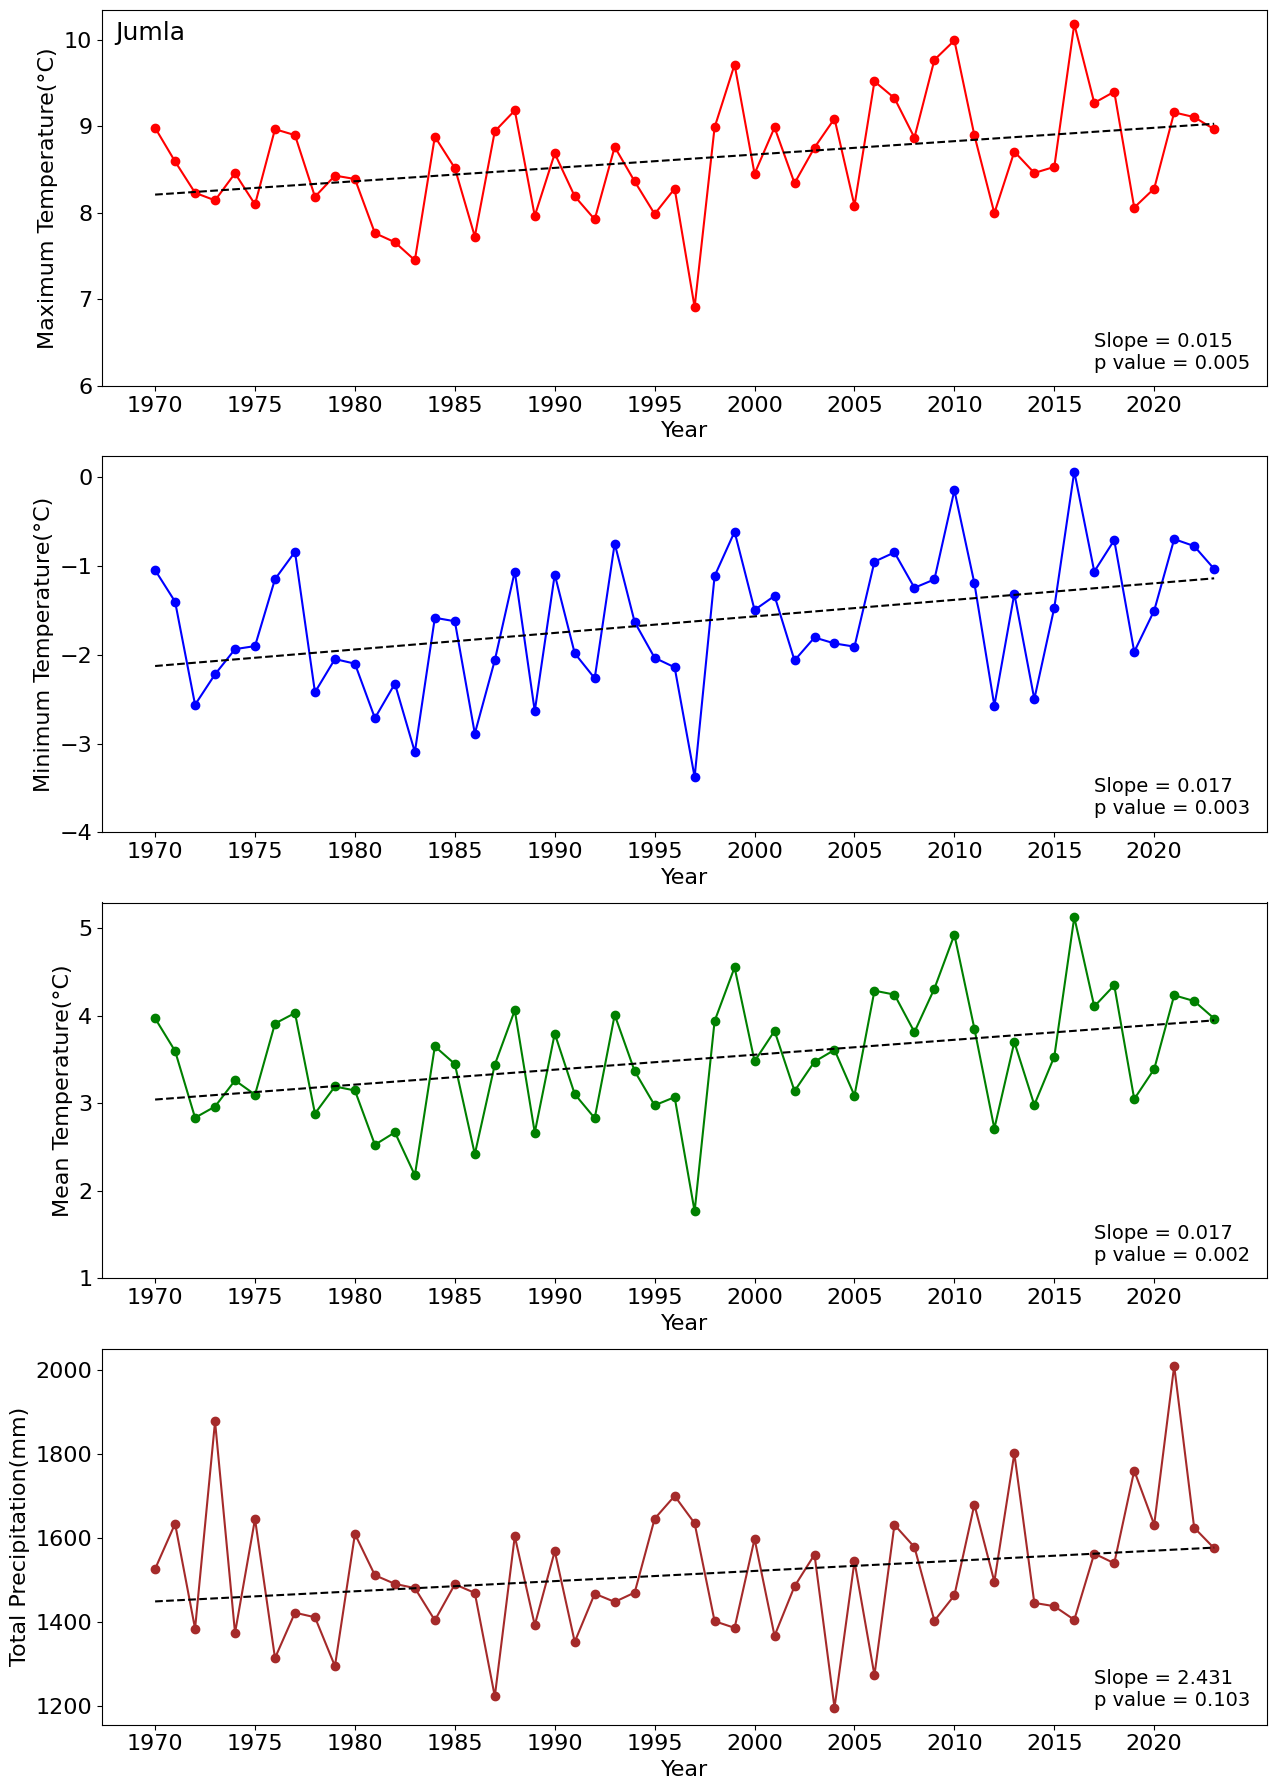

In [12]:
# %%
# Creatine a line plots for Jumla

year = tempMax_1970_2023_annual_mean["year"]
Jumla_annual_tempMax = tempMax_1970_2023_annual_mean["JUMLA"]
Jumla_annual_tempMin = tempMin_1970_2023_annual_mean["JUMLA"]
Jumla_annual_tempMean = tempMean_1970_2023_annual_mean["JUMLA"]
Jumla_annual_precpTot = precTot_1970_2023_annual_sum["JUMLA"]

# Fit linear regression model for Jumla_annual_tempMax
Jumla_annual_tempMax_coefficients = np.polyfit(year, Jumla_annual_tempMax, 1)
Jumla_annual_tempMax_polynomial = np.poly1d(Jumla_annual_tempMax_coefficients)

# Fit linear regression model for Jumla_annual_tempMin
Jumla_annual_tempMin_coefficients = np.polyfit(year, Jumla_annual_tempMin, 1)
Jumla_annual_tempMin_polynomial = np.poly1d(Jumla_annual_tempMin_coefficients)

# Fit linear regression model for Jumla_annual_tempMean
Jumla_annual_tempMean_coefficients = np.polyfit(year, Jumla_annual_tempMean, 1)
Jumla_annual_tempMean_polynomial = np.poly1d(Jumla_annual_tempMean_coefficients)

# Fit linear regression model for Jumla_annual_tempMax
Jumla_annual_precpTot_coefficients = np.polyfit(year, Jumla_annual_precpTot, 1)
Jumla_annual_precpTot_polynomial = np.poly1d(Jumla_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - Jumla (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Jumla_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Jumla_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([6,7,8,9,10], fontsize=16)
plt.text(2017,6.2,"Slope = 0.015 \np value = 0.005", fontsize=14)
plt.text(1968, 10, "Jumla", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  Jumla (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Jumla_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Jumla_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([-4,-3,-2,-1,0], fontsize=16)
plt.text(2017,-3.8,"Slope = 0.017 \np value = 0.003 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  Jumla (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Jumla_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Jumla_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([1,2,3,4,5], fontsize=16)
plt.text(2017, 1.2,"Slope = 0.017 \np value = 0.002", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - Jumla (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Jumla_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Jumla_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([1200,1400,1600,1800,2000], fontsize=16)
plt.text(2017,1200,"Slope = 2.431 \np value = 0.103", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('Jumla_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

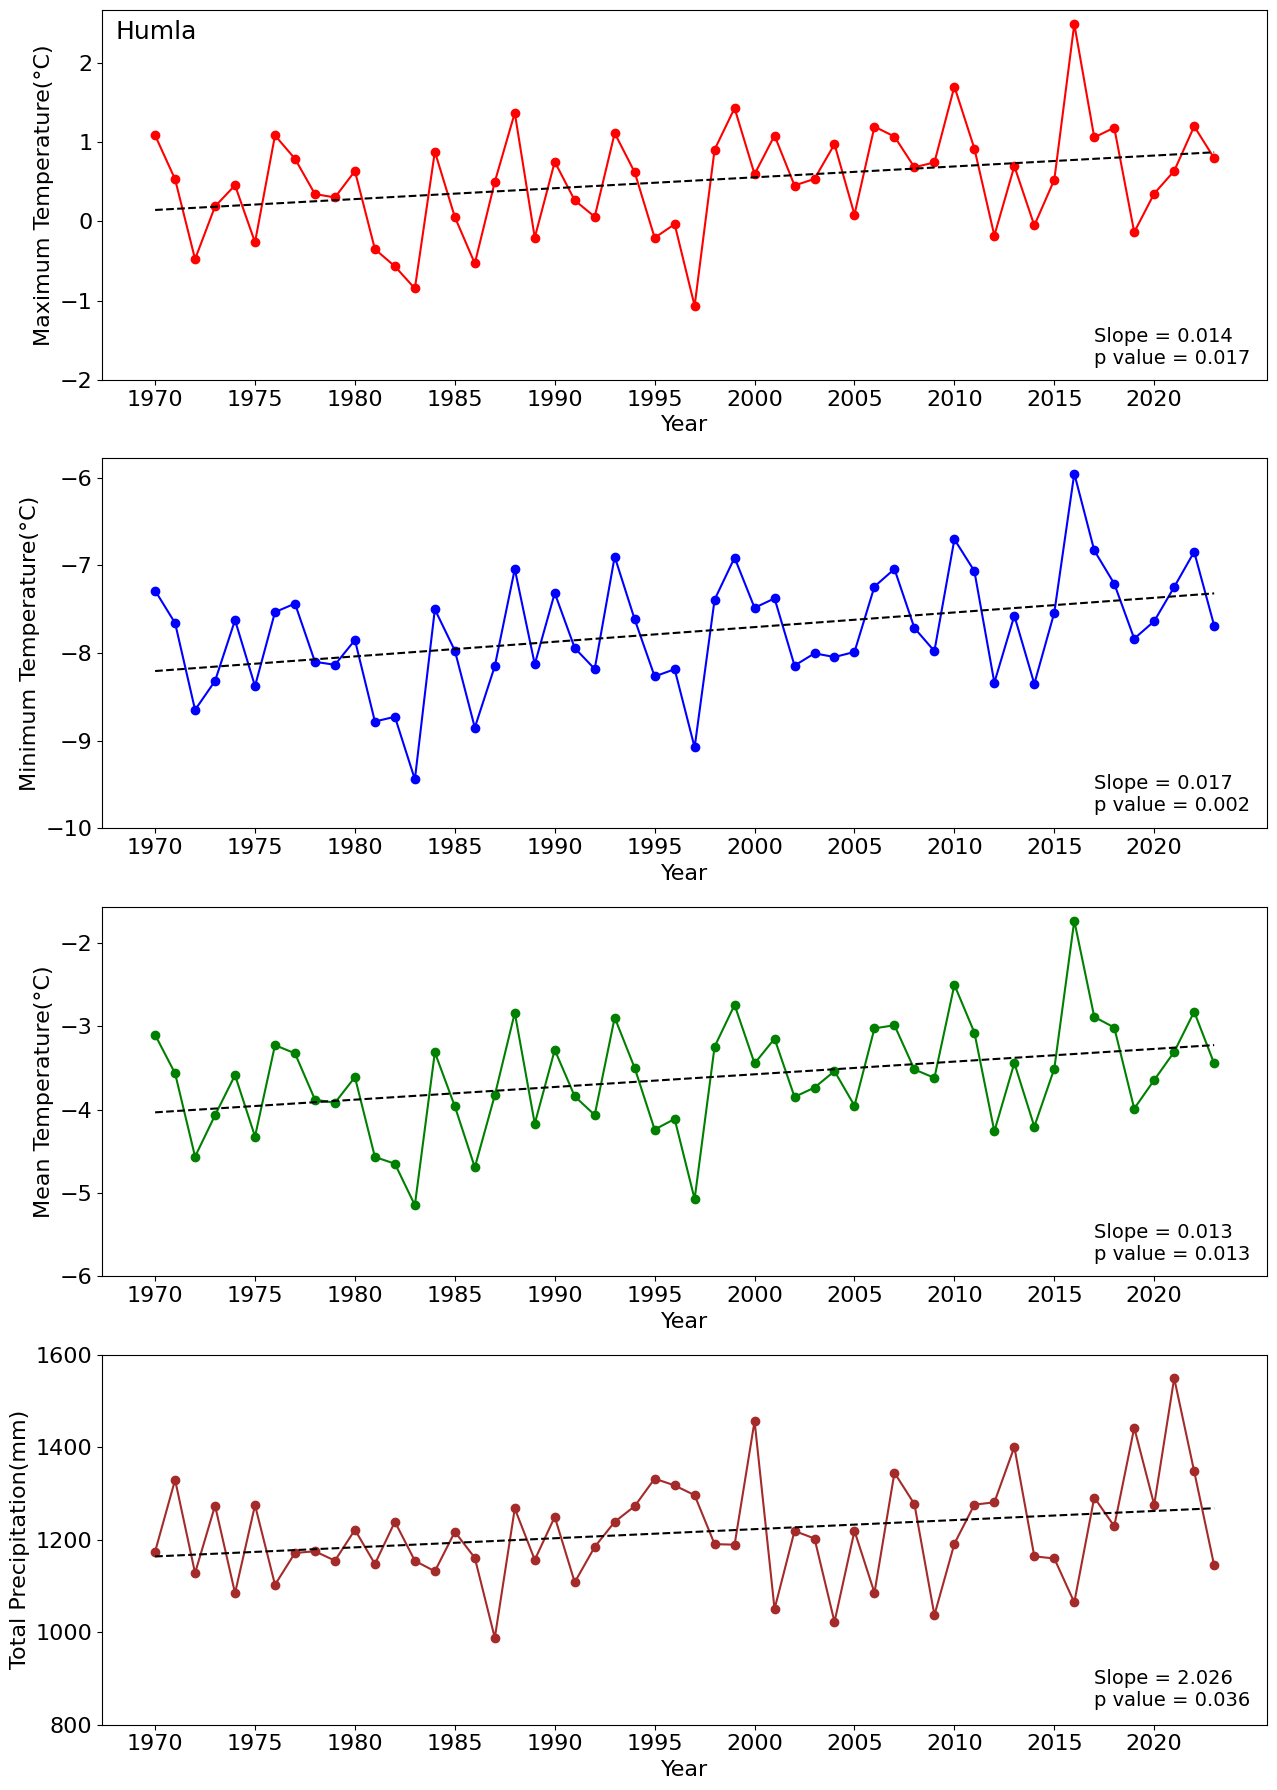

In [13]:
# %%
# Creatine a line plots for Humla

year = tempMax_1970_2023_annual_mean["year"]
Humla_annual_tempMax = tempMax_1970_2023_annual_mean["HUMLA"]
Humla_annual_tempMin = tempMin_1970_2023_annual_mean["HUMLA"]
Humla_annual_tempMean = tempMean_1970_2023_annual_mean["HUMLA"]
Humla_annual_precpTot = precTot_1970_2023_annual_sum["HUMLA"]

# Fit linear regression model for Humla_annual_tempMax
Humla_annual_tempMax_coefficients = np.polyfit(year, Humla_annual_tempMax, 1)
Humla_annual_tempMax_polynomial = np.poly1d(Humla_annual_tempMax_coefficients)

# Fit linear regression model for Humla_annual_tempMin
Humla_annual_tempMin_coefficients = np.polyfit(year, Humla_annual_tempMin, 1)
Humla_annual_tempMin_polynomial = np.poly1d(Humla_annual_tempMin_coefficients)

# Fit linear regression model for Humla_annual_tempMean
Humla_annual_tempMean_coefficients = np.polyfit(year, Humla_annual_tempMean, 1)
Humla_annual_tempMean_polynomial = np.poly1d(Humla_annual_tempMean_coefficients)

# Fit linear regression model for Humla_annual_tempMax
Humla_annual_precpTot_coefficients = np.polyfit(year, Humla_annual_precpTot, 1)
Humla_annual_precpTot_polynomial = np.poly1d(Humla_annual_precpTot_coefficients)

# Create subplots
plt.figure(figsize=(13, 18))

# Subplot 1 - Humla (Max Temperature)
plt.subplot(4, 1, 1)
plt.plot(year, Humla_annual_tempMax, marker='o', linestyle='-', color='r')
plt.plot(year, Humla_annual_tempMax_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Maximum Temperature(°C)', fontsize=16)
plt.yticks([-2,-1,0,1,2], fontsize=16)
plt.text(2017,-1.8,"Slope = 0.014 \np value = 0.017", fontsize=14)
plt.text(1968, 2.3, "Humla", fontsize = 18)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 2 -  Humla (Min Temperature)
plt.subplot(4, 1, 2)
plt.plot(year, Humla_annual_tempMin, marker='o', linestyle='-', color='b')
plt.plot(year, Humla_annual_tempMin_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Minimum Temperature(°C)', fontsize=16)
plt.yticks([-10,-9,-8,-7,-6], fontsize=16)
plt.text(2017,-9.8,"Slope = 0.017 \np value = 0.002 ", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 3 -  Humla (Mean Temperature)
plt.subplot(4, 1, 3)
plt.plot(year, Humla_annual_tempMean, marker='o', linestyle='-', color='g')
plt.plot(year, Humla_annual_tempMean_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Mean Temperature(°C)', fontsize=16)
plt.yticks([-6,-5,-4,-3,-2], fontsize=16)
plt.text(2017, -5.8,"Slope = 0.013 \np value = 0.013", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Subplot 4 - Humla (Total Precipitation)
plt.subplot(4, 1, 4)
plt.plot(year, Humla_annual_precpTot, marker='o', linestyle='-', color='brown')
plt.plot(year, Humla_annual_precpTot_polynomial(year), linestyle='--', color='black')
plt.xlabel('Year', fontsize=16)
plt.xticks([1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2020], fontsize=16)
plt.ylabel('Total Precipitation(mm)', fontsize=16)
plt.yticks([800,1000,1200,1400,1600], fontsize=16)
plt.text(2017,840,"Slope = 2.026 \np value = 0.036", fontsize=14)
#plt.legend(loc='upper left', prop={'size': 14}) 

# Adjust layout
plt.tight_layout()

# Save the figure as a TIFF file
plt.savefig('Humla_annual_climate_trend.png', format='png', dpi=300)

# Show the plot
plt.show()

##### Annual tempMax

In [19]:
# Calculate slope and p value using linregress function from scipy package. 
import scipy.stats

# Mugu_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.00479611664456217
Slope 0.016768626108223852
r_value 0.3782863667784601


In [20]:
# Kalikot_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.002578257987942681
Slope 0.014765753142705939
r_value 0.4020982521570709


In [21]:
# Jumla_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.004881318691369627
Slope 0.015428372140010423
r_value 0.3775849336819279


In [22]:
# Humla_annual_tempMax
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_tempMax)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.01698399641971816
Slope 0.013722813904790722
r_value 0.3236149696802689


#### Annual tempMean

In [23]:
# Mugu_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.004219443449043057
Slope 0.01664619623706152
r_value 0.3833444800804464


In [24]:
# Kalikot_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.000320000856543035
Slope 0.017917674377374803
r_value 0.47146221494750007


In [25]:
# Jumla_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.0029048799834401674
Slope 0.017042655096754455
r_value 0.39765441753150665


In [26]:
# Humla_annual_tempMean
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_tempMean)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.0060002308588222196
Slope 0.0152182247369894
r_value 0.36924958071215364


#### Annual tempMin

In [27]:
# Mugu_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.005783797797461353
Slope 0.016523766365899185
r_value 0.3707489876982315


In [29]:
# Kalikot_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 7.073072732033088e-05
Slope 0.021069595612043662
r_value 0.5138162580389938


In [30]:
# Jumla_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.003081048021775441
Slope 0.01865693805349849
r_value 0.3954385150502136


In [31]:
# Humla_annual_tempMin
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_tempMin)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.0025348507919571235
Slope 0.01671363556918807
r_value 0.40272597554816747


#### Annual Precipitation 

In [32]:
# Mugu_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Mugu_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.08256038309663527
Slope 2.0033924951734563
r_value 0.2384011605367253


In [33]:
# Kalikot_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Kalikot_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.1862655311609744
Slope 2.2954056153831464
r_value 0.18261791928998922


In [34]:
# Jumla_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Jumla_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.07333048133502187
Slope 2.4227991974419134
r_value 0.24569119260781871


In [35]:
# Humla_annual_precTot
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(year, Humla_annual_precpTot)
print("P-value:", p_value)
print("Slope", slope)
print("r_value", r_value )

P-value: 0.04095311976997138
Slope 1.9664258615277745
r_value 0.2791297795312822


# Annual and Seasonal Slope and p value of 4 districts using Mannkendall and linregress test

In [43]:
### Working partially only. P value is still very high so used R Seasonal slope code. 

# Mean Temperature

import pandas as pd
from scipy.stats import linregress

# Sample DataFrame
df = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/tempMean_1970_2023_monthly_mean.csv")

df = pd.DataFrame(df)

# Function to calculate seasonal slope using linear regression
def seasonal_slope(dataframe, season):
    if season == 'premonsoon':
        months = [3, 4, 5]
    elif season == 'monsoon':
        months = [6, 7, 8, 9]
    elif season == 'postmonsoon':
        months = [10, 11]
    elif season == 'winter':
        # For winter season, include December of current year and January, February of next year
        current_year_months = [12]
        next_year_months = [1, 2]
        months = current_year_months + next_year_months
    else:
        raise ValueError("Invalid season. Choose from: premonsoon, monsoon, postmonsoon, winter")
    
    # Filter dataframe for the specified season
    season_df = dataframe[dataframe['month'].isin(months)]
    
    # Calculate linear regression for each column
    trends = {}
    for column in season_df.columns[2:]:  # Exclude 'year' and 'month' columns
        x = season_df['year']
        y = season_df[column]
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        trends[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}
    
    return trends

# Function to calculate annual slope
def annual_slope(dataframe):
    # Group dataframe by year and calculate average temperature for each year
    annual_avg_temp = dataframe.groupby('year').mean().reset_index()
    
    # Calculate linear regression for each column
    trends = {}
    for column in annual_avg_temp.columns[1:]:  # Exclude 'year' column
        x = annual_avg_temp['year']
        y = annual_avg_temp[column]
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        trends[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}
    
    return trends

# Define seasons
seasons = ['premonsoon', 'monsoon', 'postmonsoon', 'winter']

# Store results for all seasons
all_results = {}

# Calculate seasonal slope for each season
for season in seasons:
    result = seasonal_slope(df, season)
    all_results[season] = result

# Calculate annual slope
annual_result = annual_slope(df)

# Save results to a CSV file
output_file = "Mean_Temp_seasonal_and_annual_slopes.csv"
with open(output_file, 'w') as f:
    # Write header
    f.write("Timeframe,Season,Variable,Slope,P-Value\n")
    
    # Write seasonal data
    for season, results in all_results.items():
        for variable, values in results.items():
            f.write(f"Seasonal,{season},{variable},{values['slope']},{values['p_value']}\n")
    
    # Write annual data
    for variable, values in annual_result.items():
        f.write(f"Annual,All,{variable},{values['slope']},{values['p_value']}\n")

print("Results saved to:", output_file)


Results saved to: Mean_Temp_seasonal_and_annual_slopes.csv


In [44]:
### Working

# Total Precipitation

import pandas as pd
from scipy.stats import linregress

# Sample DataFrame
df = pd.read_csv("C:/GIIS/USAID Karnali/Data/monthly_max_mean_min_precp (Second)/precTot_1970_2023_monthly_sum.csv")

df = pd.DataFrame(df)

# Function to calculate seasonal slope using linear regression
def seasonal_slope(dataframe, season):
    if season == 'premonsoon':
        months = [3, 4, 5]
    elif season == 'monsoon':
        months = [6, 7, 8, 9]
    elif season == 'postmonsoon':
        months = [10, 11]
    elif season == 'winter':
        # For winter season, include December of current year and January, February of next year
        current_year_months = [12]
        next_year_months = [1, 2]
        months = current_year_months + next_year_months
    else:
        raise ValueError("Invalid season. Choose from: premonsoon, monsoon, postmonsoon, winter")
    
    # Filter dataframe for the specified season
    season_df = dataframe[dataframe['month'].isin(months)]
    
    # Calculate linear regression for each column
    trends = {}
    for column in season_df.columns[2:]:  # Exclude 'year' and 'month' columns
        x = season_df['year']
        y = season_df[column]
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        trends[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}
    
    return trends

# Function to calculate annual slope
def annual_slope(dataframe):
    # Group dataframe by year and calculate average temperature for each year
    annual_avg_temp = dataframe.groupby('year').mean().reset_index()
    
    # Calculate linear regression for each column
    trends = {}
    for column in annual_avg_temp.columns[1:]:  # Exclude 'year' column
        x = annual_avg_temp['year']
        y = annual_avg_temp[column]
        
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)
        
        trends[column] = {'slope': slope, 'intercept': intercept, 'r_value': r_value, 'p_value': p_value, 'std_err': std_err}
    
    return trends

# Define seasons
seasons = ['premonsoon', 'monsoon', 'postmonsoon', 'winter']

# Store results for all seasons
all_results = {}

# Calculate seasonal slope for each season
for season in seasons:
    result = seasonal_slope(df, season)
    all_results[season] = result

# Calculate annual slope
annual_result = annual_slope(df)

# Save results to a CSV file
output_file = "Total_Precipitation_seasonal_and_annual_slopes.csv"
with open(output_file, 'w') as f:
    # Write header
    f.write("Timeframe,Season,Variable,Slope,P-Value\n")
    
    # Write seasonal data
    for season, results in all_results.items():
        for variable, values in results.items():
            f.write(f"Seasonal,{season},{variable},{values['slope']},{values['p_value']}\n")
    
    # Write annual data
    for variable, values in annual_result.items():
        f.write(f"Annual,All,{variable},{values['slope']},{values['p_value']}\n")

print("Results saved to:", output_file)


Results saved to: Total_Precipitation_seasonal_and_annual_slopes.csv


### Clipping palika of 4 districts

- Shirish, since you have already done the modeling work, can you please also clip the current potential suitability for each palika of those district. You don’t have to run the model, just need to clip the results of the current and future 540 scenario

In [47]:
# Clipping each palika of 4 districts

# MUGU

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Filter the GeoDataFrame to select only features where the district is "MUGU"
mugu_gdf = gdf[gdf['DISTRICT'] == 'MUGU']

# Create a folder to save the filtered shapefiles
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU"
os.makedirs(output_folder, exist_ok=True)

# Iterate through unique values in the "GaPa_NaPa" column
for gapanapa_name in mugu_gdf['GaPa_NaPa'].unique():
    # Filter the GeoDataFrame based on the current GaPa_NaPa name
    filtered_gdf = mugu_gdf[mugu_gdf['GaPa_NaPa'] == gapanapa_name]
    
    # Construct the output shapefile path
    output_shapefile_path = os.path.join(output_folder, f"MUGU_{gapanapa_name}.shp")
    
    # Save the filtered GeoDataFrame as a shapefile
    filtered_gdf.to_file(output_shapefile_path)

print("Shapefiles saved successfully!")


Shapefiles saved successfully!


In [50]:
# Clipping each palika of 4 districts

# KALIKOT

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Filter the GeoDataFrame to select only features where the district is "KALIKOT"
mugu_gdf = gdf[gdf['DISTRICT'] == 'KALIKOT']

# Create a folder to save the filtered shapefiles
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT"
os.makedirs(output_folder, exist_ok=True)

# Iterate through unique values in the "GaPa_NaPa" column
for gapanapa_name in mugu_gdf['GaPa_NaPa'].unique():
    # Filter the GeoDataFrame based on the current GaPa_NaPa name
    filtered_gdf = mugu_gdf[mugu_gdf['GaPa_NaPa'] == gapanapa_name]
    
    # Construct the output shapefile path
    output_shapefile_path = os.path.join(output_folder, f"KALIKOT_{gapanapa_name}.shp")
    
    # Save the filtered GeoDataFrame as a shapefile
    filtered_gdf.to_file(output_shapefile_path)

print("Shapefiles saved successfully!")


Shapefiles saved successfully!


In [51]:
# Clipping each palika of 4 districts

# JUMLA

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Filter the GeoDataFrame to select only features where the district is "KALIKOT"
mugu_gdf = gdf[gdf['DISTRICT'] == 'JUMLA']

# Create a folder to save the filtered shapefiles
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA"
os.makedirs(output_folder, exist_ok=True)

# Iterate through unique values in the "GaPa_NaPa" column
for gapanapa_name in mugu_gdf['GaPa_NaPa'].unique():
    # Filter the GeoDataFrame based on the current GaPa_NaPa name
    filtered_gdf = mugu_gdf[mugu_gdf['GaPa_NaPa'] == gapanapa_name]
    
    # Construct the output shapefile path
    output_shapefile_path = os.path.join(output_folder, f"JUMLA_{gapanapa_name}.shp")
    
    # Save the filtered GeoDataFrame as a shapefile
    filtered_gdf.to_file(output_shapefile_path)

print("Shapefiles saved successfully!")


Shapefiles saved successfully!


In [52]:
# Clipping each palika of 4 districts

# HUMLA

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Filter the GeoDataFrame to select only features where the district is "KALIKOT"
mugu_gdf = gdf[gdf['DISTRICT'] == 'HUMLA']

# Create a folder to save the filtered shapefiles
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA"
os.makedirs(output_folder, exist_ok=True)

# Iterate through unique values in the "GaPa_NaPa" column
for gapanapa_name in mugu_gdf['GaPa_NaPa'].unique():
    # Filter the GeoDataFrame based on the current GaPa_NaPa name
    filtered_gdf = mugu_gdf[mugu_gdf['GaPa_NaPa'] == gapanapa_name]
    
    # Construct the output shapefile path
    output_shapefile_path = os.path.join(output_folder, f"HUMLA_{gapanapa_name}.shp")
    
    # Save the filtered GeoDataFrame as a shapefile
    filtered_gdf.to_file(output_shapefile_path)

print("Shapefiles saved successfully!")


Shapefiles saved successfully!


In [53]:
# MUGU District

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Choose the district you want to export
chosen_district = "MUGU"

# Filter the GeoDataFrame to select only features where the district matches the chosen district
filtered_gdf = gdf[gdf['DISTRICT'] == chosen_district]

# Create a folder to save the filtered shapefile
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU"
os.makedirs(output_folder, exist_ok=True)

# Construct the output shapefile path
output_shapefile_path = os.path.join(output_folder, f"{chosen_district}_district.shp")

# Save the filtered GeoDataFrame as a shapefile
filtered_gdf.to_file(output_shapefile_path)

print(f"Shapefile for {chosen_district} district saved successfully!")


Shapefile for MUGU district saved successfully!


In [54]:
# KALIKOT District

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Choose the district you want to export
chosen_district = "KALIKOT"

# Filter the GeoDataFrame to select only features where the district matches the chosen district
filtered_gdf = gdf[gdf['DISTRICT'] == chosen_district]

# Create a folder to save the filtered shapefile
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT"
os.makedirs(output_folder, exist_ok=True)

# Construct the output shapefile path
output_shapefile_path = os.path.join(output_folder, f"{chosen_district}_district.shp")

# Save the filtered GeoDataFrame as a shapefile
filtered_gdf.to_file(output_shapefile_path)

print(f"Shapefile for {chosen_district} district saved successfully!")


Shapefile for KALIKOT district saved successfully!


In [55]:
# JUMLA District

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Choose the district you want to export
chosen_district = "JUMLA"

# Filter the GeoDataFrame to select only features where the district matches the chosen district
filtered_gdf = gdf[gdf['DISTRICT'] == chosen_district]

# Create a folder to save the filtered shapefile
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA"
os.makedirs(output_folder, exist_ok=True)

# Construct the output shapefile path
output_shapefile_path = os.path.join(output_folder, f"{chosen_district}_district.shp")

# Save the filtered GeoDataFrame as a shapefile
filtered_gdf.to_file(output_shapefile_path)

print(f"Shapefile for {chosen_district} district saved successfully!")


Shapefile for JUMLA district saved successfully!


In [56]:
# HUMLA District

import os
import geopandas as gpd

# Path to your original shapefile
shapefile_path = "C:/GIIS/Shape files/Suraj Nepal Data/NepalLocalUnits0_2023_July_26_03_41_21/NepalLocalUnits0/NepalLocalUnits0.shp"

# Read the shapefile into a GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Choose the district you want to export
chosen_district = "HUMLA"

# Filter the GeoDataFrame to select only features where the district matches the chosen district
filtered_gdf = gdf[gdf['DISTRICT'] == chosen_district]

# Create a folder to save the filtered shapefile
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA"
os.makedirs(output_folder, exist_ok=True)

# Construct the output shapefile path
output_shapefile_path = os.path.join(output_folder, f"{chosen_district}_district.shp")

# Save the filtered GeoDataFrame as a shapefile
filtered_gdf.to_file(output_shapefile_path)

print(f"Shapefile for {chosen_district} district saved successfully!")


Shapefile for HUMLA district saved successfully!


## Clipping current and 540 results by palika of 4 major districts

### Current Humla

In [2]:
# current

# HUMLA

# Adanchuli

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Adanchuli.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Adanchuli"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [3]:
# current

# HUMLA

# Chankheli

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Chankheli.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Chankheli"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [4]:
# current

# HUMLA

# Kharpunath

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Kharpunath.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Kharpunath"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [5]:
# current

# HUMLA

# Namkha

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Namkha.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Namkha"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [6]:
# current

# HUMLA

# Sarkegad

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Sarkegad.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Sarkegad"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [7]:
# current

# HUMLA

# Simkot

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Simkot.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Simkot"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [9]:
# current

# HUMLA

# Tanjakot

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Tanjakot.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/current/Tanjakot"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### 540 Humla

In [10]:
# current

# HUMLA

# Adanchuli

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Adanchuli.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Adanchuli"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [11]:
# current

# HUMLA

# Chankheli

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Chankheli.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Chankheli"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [12]:
# current

# HUMLA

# Kharpunath

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Kharpunath.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Kharpunath"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [13]:
# current

# HUMLA

# Namkha

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Namkha.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Namkha"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [14]:
# current

# HUMLA

# Sarkegad

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Sarkegad.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Sarkegad"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [15]:
# current

# HUMLA

# Simkot

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Simkot.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Simkot"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [16]:
# current

# HUMLA

# Tanjakot

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/HUMLA_Tanjakot.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/HUMLA/Clipped/540/Tanjakot"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### Current Jumla

In [17]:
# current

# JUMLA

# Chandannath

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Chandannath.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Chandannath"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [18]:
# current

# JUMLA

# Guthichaur

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Guthichaur.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Guthichaur"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [19]:
# current

# JUMLA

# Hima

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Hima.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Hima"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [20]:
# current

# JUMLA

# Kanakasundari

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Kanakasundari.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Kanakasundari"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [21]:
# current

# JUMLA

# Patrasi

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Patrasi.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Patrasi"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [22]:
# current

# JUMLA

# Sinja

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Sinja.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Sinja"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [23]:
# current

# JUMLA

# Tatopani

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Tatopani.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Tatopani"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [24]:
# current

# JUMLA

# Tila

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Tila.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/current/Tila"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### 540 Jumla

In [25]:
# current

# JUMLA

# Chandannath

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Chandannath.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Chandannath"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [26]:
# current

# JUMLA

# Guthichaur

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Guthichaur.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Guthichaur"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [27]:
# current

# JUMLA

# Hima

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Hima.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Hima"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [28]:
# current

# JUMLA

# Kanakasundari

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Kanakasundari.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Kanakasundari"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [29]:
# current

# JUMLA

# Patrasi

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Patrasi.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Patrasi"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [30]:
# current

# JUMLA

# Sinja

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Sinja.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Sinja"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [31]:
# current

# JUMLA

# Tatopani

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Tatopani.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Tatopani"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [32]:
# current

# JUMLA

# Tila

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/JUMLA_Tila.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/JUMLA/Clipped/540/Tila"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### Current Kalilot

In [33]:
# current

# KALIKOT

# Kalika

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Kalika.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Kalika"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [34]:
# current

# KALIKOT

# Khandachakra

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Khandachakra.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Khandachakra"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [35]:
# current

# KALIKOT

# Mahawai

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Mahawai.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Mahawai"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [36]:
# current

# KALIKOT

# Naraharinath

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Naraharinath.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Naraharinath"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [37]:
# current

# KALIKOT

# Pachaljharana

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Pachaljharana.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Pachaljharana"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [38]:
# current

# KALIKOT

# Palata

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Palata.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Palata"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [39]:
# current

# KALIKOT

# Raskot

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Raskot.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Raskot"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [40]:
# current

# KALIKOT

# Sanni Tribeni

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Sanni Tribeni.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Sanni Tribeni"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [41]:
# current

# KALIKOT

# Tilagufa

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Tilagufa.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/current/Tilagufa"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### 540 Kalikot


In [42]:
# current

# KALIKOT

# Kalika

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Kalika.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Kalika"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [43]:
# current

# KALIKOT

# Khandachakra

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Khandachakra.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Khandachakra"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [44]:
# current

# KALIKOT

# Mahawai

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Mahawai.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Mahawai"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [45]:
# current

# KALIKOT

# Naraharinath

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Naraharinath.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Naraharinath"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [46]:
# current

# KALIKOT

# Pachaljharana

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Pachaljharana.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Pachaljharana"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [47]:
# current

# KALIKOT

# Palata

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Palata.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Palata"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [48]:
# current

# KALIKOT

# Raskot

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Raskot.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Raskot"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [49]:
# current

# KALIKOT

# Sanni Tribeni

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Sanni Tribeni.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Sanni Tribeni"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [50]:
# current

# KALIKOT

# Tilagufa

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/KALIKOT_Tilagufa.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/KALIKOT/Clipped/540/Tilagufa"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### Current Mugu

In [52]:
# current

# MUGU

# Chhayanath Rara

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Chhayanath Rara.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/current/Chhayanath Rara"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [53]:
# current

# MUGU

# Khatyad

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Khatyad.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/current/Khatyad"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [54]:
# current

# MUGU

# Mugum Karmarong

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Mugum Karmarong.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/current/Mugum Karmarong"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [55]:
# current

# MUGU

# Soru

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/cur/cur output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Soru.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/current/Soru"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


### 540 MUGU

In [56]:
# current

# MUGU

# Chhayanath Rara

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Chhayanath Rara.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/540/Chhayanath Rara"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [57]:
# current

# MUGU

# Khatyad

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Khatyad.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/540/Khatyad"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [58]:
# current

# MUGU

# Mugum Karmarong

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Mugum Karmarong.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/540/Mugum Karmarong"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!


In [59]:
# current

# MUGU

# Soru

import os
import rasterio
from rasterio.plot import show
from rasterio.mask import mask
from shapely.geometry import mapping
import geopandas as gpd

# Define function to clip raster with shapefile
def clip_raster_with_shapefile(raster_file, shapefile, output_folder):
    # Open raster file
    with rasterio.open(raster_file) as src:
        # Open shapefile
        shape = gpd.read_file(shapefile)
        # Get the geometry of the shapefile
        geoms = shape.geometry.values
        # Convert the geometry to GeoJSON format
        geoms = [mapping(geom) for geom in geoms]

        # Clip the raster with shapefile
        out_image, out_transform = mask(src, geoms, crop=True)
        out_meta = src.meta.copy()

        # Update metadata
        out_meta.update({"driver": "GTiff",
                         "height": out_image.shape[1],
                         "width": out_image.shape[2],
                         "transform": out_transform})

        # Create output file name
        output_file = os.path.join(output_folder, os.path.basename(raster_file))
        
        # Write the clipped raster to the output folder
        with rasterio.open(output_file, "w", **out_meta) as dest:
            dest.write(out_image)

# Paths
raster_folder = "D:/FINAL Biomod2 (23.01.2024)/Results/Value 1 and pixel count/540/540 output (third)/Nepal"
shapefile = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/MUGU_Soru.shp"
output_folder = "C:/GIIS/USAID Karnali/Biomod clipping/MUGU/Clipped/540/Soru"

# Loop through each raster file in the folder
for file in os.listdir(raster_folder):
    if file.endswith(".tif"):
        raster_file = os.path.join(raster_folder, file)
        clip_raster_with_shapefile(raster_file, shapefile, output_folder)

print("Clipping completed!")


Clipping completed!
